In [1]:
# !pip install transforms3d

In [2]:
import numpy as np
import matplotlib.pylab as plt
import transforms3d as Trans

In [3]:
def Make_euler_Transfrommatrix(X_angle = np.pi/2, Y_angle =0, Z_angle =0, order = 'sxyz', Translate = [0, 0,0], Shear = [0, 0, 0]):
    '''
    X_angle, Y_angle, Z_angle in radian
    '''

    np.set_printoptions(precision=3, suppress=True)  # neat printing
    x_angle = X_angle
    y_angle = Y_angle
    z_angle = Z_angle
    R = Trans.euler.euler2mat(x_angle, y_angle, z_angle, 'sxyz')
    Sc = [1, 1, 1] # similarity

    T = Translate
    S = Shear
    B = Trans.affines.compose(T, R, Sc, S)
    
    return B

In [13]:
T = Make_euler_Transfrommatrix(X_angle = -np.pi/2, Y_angle= -np.pi/2, Z_angle= 0, order = 'szxy', Translate = [3, 5, 10])

In [14]:
Trans.euler.mat2euler(T[:3, :3])

(-1.5707963267948966, -1.5707963267948966, 0.0)

In [4]:
def make_H_coordinate(bottom_points):
    Bottom_p = np.array(bottom_points).T
    H_Bottom_p = np.ones((Bottom_p.shape[0] + 1,Bottom_p.shape[1]))
    H_Bottom_p[:-1:, :] = Bottom_p
    return H_Bottom_p

In [5]:
bottom_points = [[0,0,1],[0,5,1], [2, 5, 1], [2, 4, 1],  [1, 4, 1], [1, 3, 1], [2, 3, 1], [2, 2, 1], [1,2,1], [1,0,1],
         [0,0,1],[0,5,1], [2, 5, 1], [2, 4, 1],  [1, 4, 1], [1, 3, 1], [2, 3, 1], [2, 2, 1], [1,2,1], [1,0,1]]

top_points = [[0,0,2],[0,5,2], [2, 5, 2], [2, 4, 2],  [1, 4, 2], [1, 3, 2], [2, 3, 2], [2, 2, 2], [1,2,2], [1,0,2],
         [0,0,2],[0,5,2], [2, 5, 2], [2, 4, 2],  [1, 4, 2], [1, 3, 2], [2, 3, 2], [2, 2, 2], [1,2,2], [1,0,2]]



In [6]:
def draw_3D_transform(bottom_points, top_points,T):
    
    import matplotlib.patches as mpatches

    orange_patch = mpatches.Patch(color='orange', label='Original')
    indianred_patch = mpatches.Patch(color='indianred', label='Translated')
    
    
    
    H_Bottom_p = make_H_coordinate(bottom_points)
    H_Top_p = make_H_coordinate(top_points)
    
    
    
    
    def drawing_poly(points, C = 'orange'):
        for i in range(points.shape[1]):
            ax.scatter(points[0,i], points[1,i] ,points[2,i],  marker = 'o', color = C)

        for i in range(points.shape[1]):
            if i < (points.shape[1]-1):
                ax.plot([points[0, i], points[0, i+1]],
                        [points[1, i], points[1, i+1]],
                        zs=[points[2, i], points[2, i+1]], color='slateblue')
            else:
                ax.plot([points[0, 0], points[0, i]],
                        [points[1,0], points[1, i]],
                        zs=[points[2,0], points[2, i]], color='slateblue')
        return
    
    def drawing_vlines(bottom_points, top_points):
    
        for i in range(bottom_points.shape[1]):
            if i < (bottom_points.shape[1]-1):
                ax.plot([bottom_points[0, i], top_points[0, i]],
                        [bottom_points[1, i], top_points[1, i]],
                        zs=[bottom_points[2, i], top_points[2, i]], color='slateblue')
        return

    from mpl_toolkits.mplot3d import proj3d
    %matplotlib inline
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    drawing_poly(H_Bottom_p)
    drawing_poly(H_Top_p)
    drawing_vlines(H_Bottom_p, H_Top_p)


    Trans_T = np.dot(T, H_Top_p)
    Trans_B = np.dot(T, H_Bottom_p)
    drawing_poly(Trans_B, C = 'indianred')
    drawing_poly(Trans_T, C = 'indianred')
    drawing_vlines(Trans_B, Trans_T)
    plt.legend(handles=[orange_patch, indianred_patch])
    
    return


In [7]:
T = Make_euler_Transfrommatrix(X_angle = np.pi/4, Y_angle =-np.pi/6,
                               Z_angle =0, order = 'sxyz',
                               Translate = [0, 0, 3], Shear = [0.5, 0, 0])

In [8]:
T

array([[ 0.866,  0.079, -0.354,  0.   ],
       [ 0.   ,  0.707, -0.707,  0.   ],
       [ 0.5  ,  0.862,  0.612,  3.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

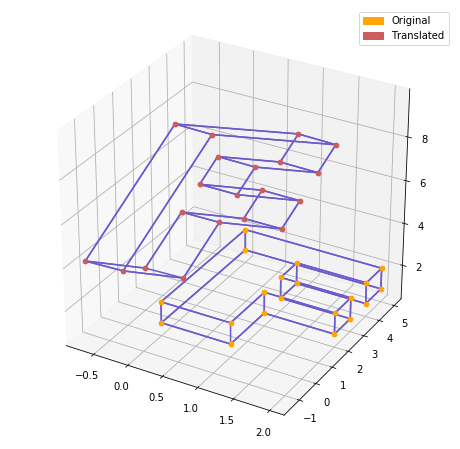

In [9]:
draw_3D_transform(bottom_points, top_points, T)

## Axis angle

In [10]:
direc = np.random.random(3) - 0.5 # directional vector
angle = (np.random.random() - 0.5) * (2*np.pi) # angle
R0 = Trans.axangles.axangle2mat(direc, angle)

In [11]:
def Make_Axis_angle_Transfrommatrix(direc, angle, Translate = [0, 0, 0], Shear = [0, 0, 0]):
    '''
    X_angle, Y_angle, Z_angle in radian
    '''

    np.set_printoptions(precision=3, suppress=True)  # neat printing
    direc = np.random.random(3) - 0.5
    angle = (np.random.random() - 0.5) * (2*np.pi)
    R = Trans.axangles.axangle2mat(direc, angle)
    Sc = [1, 1, 1] # similarity

    T = Translate
    S = Shear
    B = Trans.affines.compose(T, R, Sc, S)
    
    return B

In [12]:
T = Make_Axis_angle_Transfrommatrix(direc, angle)

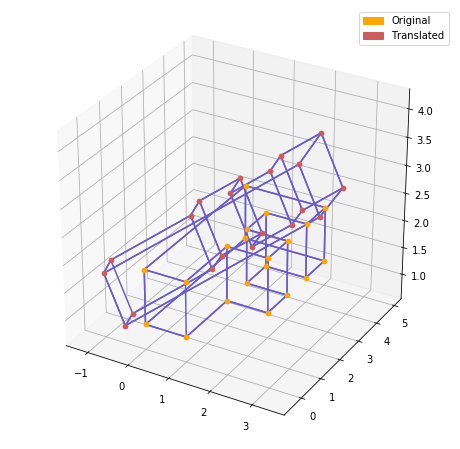

In [13]:
draw_3D_transform(bottom_points, top_points,T)

## quaternions

In [14]:
q = [0, 1, 0, 0] # 180 degree rotation around axis 0

In [15]:
def Make_quaternions_angle_Transfrommatrix(q, Translate = [0, 0, 0], Shear = [0, 0, 0]):
    '''
    X_angle, Y_angle, Z_angle in radian
    '''

    np.set_printoptions(precision=3, suppress=True)  # neat printing
    R = Trans.quaternions.quat2mat(q)

    T = Translate
    S = Shear
    Sc = [1, 1, 1] # similarity
    B = Trans.affines.compose(T, R, Sc, S)
    
    return B

In [16]:
T = Make_quaternions_angle_Transfrommatrix(q)

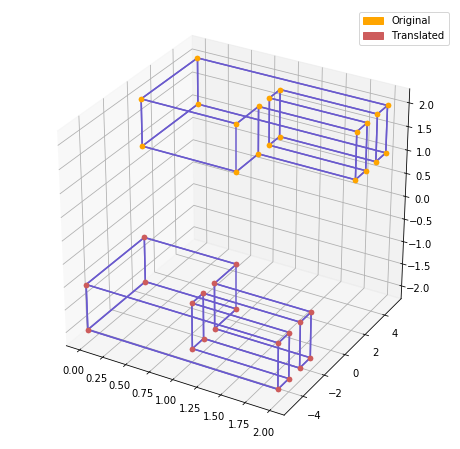

In [17]:
draw_3D_transform(bottom_points, top_points,T)